In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


In [2]:
# FUNCIONES DE ACTIVACION
class function(object):
    def __init__(self,funcion,derivative=None):
        self.F=funcion
        self.D=derivative

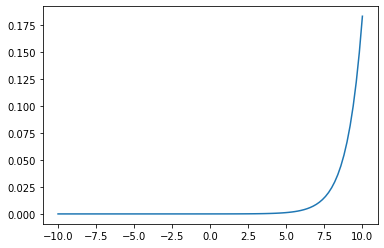

In [3]:


#funciones de activación

def cross_entropy(predictions, targets, epsilon=1e-12):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce



lineal=function(funcion=lambda x:x,derivative=lambda x:1)
sigm=function(funcion=lambda x: 1 / (1 + np.e ** (-x)),derivative=lambda x: x * (1 - x))
tanh=function(funcion=lambda x: 2 / (1 + np.e ** (2*x))-1,derivative=lambda x:1-((2 / (1 + np.e ** (2*x)))-1)**2)

softmax=function(funcion=lambda x: np.exp(x) / np.sum(np.exp(x), axis=0), derivative=lambda x:x*(1-x))
relu=function(funcion=lambda x: np.maximum(0, x) ,derivative=lambda x: np.where(x<=0,0,1))

# funciones de coste
l2_cost=function(funcion=lambda Yp, Yr: np.mean((Yp - Yr) ** 2) ,derivative=lambda Yp, Yr: (Yp - Yr))

_x = np.linspace(-10, 10, 100)

plt.plot(_x, softmax.F(_x),"tab:blue")



In [4]:
# CLASE DE LA CAPA DE LA RED
from IPython.display import clear_output
import time
class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    self.act = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    
# creación de una red neuronal según topologia
def create_nn(topology):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    print(l,layer)
    nn.append(neural_layer(topology[l][0], topology[l+1][0], topology[l][1]))
  return nn
    
# fucnción de predicción (fordware pass)    
def predict(neural_net, X):
  
  out = [(None, X)] #primer data necesario
  
  # Forward pass
  for l, layer in enumerate(neural_net):
  
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act.F(z)
  
    out.append((z, a))
  return out[-1][1]
  
# función retropropagación del error
def backward_pass(neural_net, X, Y, l2_cost, lr=0.5,batch_size=1):
  out = [(None, X)] #primer data necesario
  
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act.F(z)
    out.append((z, a))

  # Backward pass 
  deltas = []
  for l in reversed(range(0, len(neural_net))):
    z = out[l+1][0]
    a = out[l+1][1]
    if l == len(neural_net) - 1:
      deltas.insert(0, l2_cost.D(a, Y) * neural_net[l].act.D(a))
    else:
      deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act.D(a))
    _W = neural_net[l].W
 
    # Gradient descent
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
    neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  return out[-1][1]
  
# función de entrenamiento de la red
def train(neural_net,X,Y,l2_cost,lr=0.5,epoch=1000,batch_size=1):
    loss = []
    bar=0
    for i in range(epoch):
        # Entrenemos a la red!
        pY = backward_pass(neural_n, X, Y, l2_cost, lr,batch_size=1)
        loss.append(l2_cost.F(pY, Y))
        percen=int(i*100/epoch)
        if bar<percen:
            print("traing task:{}%".format(int(percen+1)))
            print("epoch={}, loss={}".format(i,l2_cost.F(pY,Y)),end="")
            clear_output(wait=True)
            bar=percen
            time.sleep(0.05)
      
    return loss

In [5]:
import csv


def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom

Y=[]
X=[]
with open('gender_voice_dataset.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        #print([round(float(x),3) for x in row[:-1]])
        X.append([float(x) for x in row[:-1]])
        if row[20]=="male":
            Y.append([1,0])
        else:
            Y.append([0,1])

X=np.array(X)
Y=np.array(Y)
X=scale(X,-1,1)
print(np.shape(X))
print(np.round(X,5))

(3168, 20)
[[-0.80716 -0.05318 -0.99982 ... -1.      -1.      -1.     ]
 [-0.74834  0.01015 -0.99975 ... -1.      -0.99999 -0.99983]
 [-0.64156  0.35107 -0.99978 ... -1.      -1.      -0.99985]
 ...
 [-0.0301   0.59808 -0.99854 ... -0.99972 -0.9996  -0.99935]
 [-0.01497  0.49138 -0.99853 ... -0.99965 -0.99951 -0.99897]
 [ 0.1914   0.53793 -0.99854 ... -0.99995 -0.99993 -0.99884]]


In [6]:
# definicion de la red
topology = [(20,sigm),(60,sigm),(20,sigm),(2,sigm)]
#topology = [(4,sigm),(8,sigm),(4,sigm),(3,softmax)]
neural_n = create_nn(topology)  
# FUNCION DE ENTRENAMIENTO

epoch=4000
lr=0.01
batch_size=1
loss = []


loss=train(neural_n,X,Y,l2_cost,lr,epoch,batch_size)



0 (4, <__main__.function object at 0x7fad9c543a58>)
1 (8, <__main__.function object at 0x7fad9c543a58>)
2 (4, <__main__.function object at 0x7fad9c543a58>)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 20)

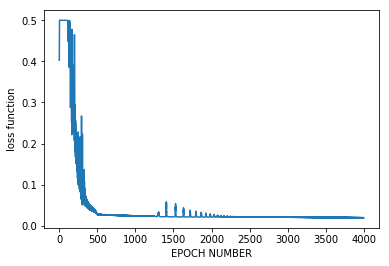

In [7]:
plt.plot(range(len(loss)), loss)
#plt.axis([0, epoch, 0, 1])
plt.ylabel("loss function")
plt.xlabel("EPOCH NUMBER")
plt.show()
 

In [111]:
# VISUALIZACIÓN Y TEST
#  ahora podemos interrogar. el primer valor es el bias
for i in range(len(X)):
    print("predecir ",X[i],"--",Y[i]," predict: ",np.round(predict(neural_n,X[i])))


predecir  [-0.80716281 -0.05318288 -0.99982158 -0.99986865 -0.99963082 -0.99927893
 -0.26429388 -0.58344138  0.27159512  0.12905143 -1.         -0.80716281
 -0.68458732 -0.99990517 -0.9972983  -1.         -0.99995312 -1.
 -1.         -1.        ] -- [1 0]  predict:  [[1. 0.]]
predecir  [-0.74834393  0.0101493  -0.99975207 -0.99983022 -0.9996115  -0.99930119
  0.28855724 -0.03246821  0.26192842  0.18315681 -1.         -0.74834393
 -0.4247168  -0.99990318 -0.99770272 -0.99999853 -0.99995312 -0.99999545
 -0.99999359 -0.99982543] -- [1 0]  predict:  [[1. 0.]]
predecir  [-0.64155567  0.35107163 -0.99978182 -0.99992502 -0.99930487 -0.99870644
  0.77051058  0.56454989 -0.1145246   0.09676402 -1.         -0.64155567
 -0.526109   -0.99990591 -0.99737142 -0.99999978 -0.99995312 -0.99999924
 -0.99999893 -0.99984573] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.05652181  0.1092218  -0.99875387 -0.99914732 -0.99871065 -0.99884733
 -0.93690118 -0.99677435  0.84652195  0.71291415 -0.99931528  0.056521

 -0.9999594  -0.99903552] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.24712683 -0.09686805 -0.99880588 -0.99892925 -0.99854472 -0.99888787
 -0.9406074  -0.99780551  0.56839063  0.0770426  -0.99885489  0.24712683
 -0.19314089 -0.99989807 -0.99737142 -0.99946081 -0.99995312 -0.999475
 -0.99925962 -0.9995625 ] -- [1 0]  predict:  [[1. 0.]]
predecir  [-0.6568042   0.47013603 -0.99984417 -0.99998077 -0.99924894 -0.99854623
 -0.33331806 -0.74885445 -0.39305938 -0.07140348 -0.99999346 -0.6568042
 -0.43561917 -0.99989729 -0.99751046 -0.99988005 -0.99995312 -0.99985682
 -0.99979808 -0.99960264] -- [1 0]  predict:  [[1. 0.]]
predecir  [-0.91603027  0.06911931 -0.99995919 -0.9999292  -0.99988028 -0.99957756
 -0.81798001 -0.98342267 -0.24559772 -0.34566757 -0.99950982 -0.91603027
 -0.51049714 -0.99988889 -0.9972983  -0.99978526 -0.99995312 -0.99952727
 -0.33333333 -0.99976812] -- [1 0]  predict:  [[1. 0.]]
predecir  [-0.80844254  0.12420386 -0.99986423 -0.99992789 -0.99974206 -0.99936873
 -0.68209

 -0.99954808 -0.99909538] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.28327292 -0.0296397  -0.99854919 -0.99900999 -0.99856807 -0.99881485
 -0.93263618 -0.9951887   0.67761578  0.31052915 -0.99851092  0.28327292
 -0.59343629 -0.99989833 -0.9974421  -0.99902599 -0.99995312 -0.99939091
 -0.99914103 -0.99949564] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.26551307  0.04899186 -0.99861462 -0.99903163 -0.99843137 -0.99857744
 -0.8763848  -0.98991862  0.54749621  0.30016851 -0.99856535  0.26551307
 -0.60321403 -0.99984343 -0.9974421  -0.99938718 -0.99995312 -0.99965606
 -0.99951496 -0.9994583 ] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.21198466  0.00922731 -0.99861171 -0.99908779 -0.99859303 -0.99874819
 -0.90885781 -0.99237316  0.7521676   0.51057655 -0.99864164  0.21198466
 -0.66793085 -0.99982776 -0.99770272 -0.99908604 -0.99995312 -0.99958939
 -0.99942094 -0.99934206] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.30138262 -0.00579023 -0.99856952 -0.99893172 -0.99848357 -0.99879139
 -0.92

 -0.99890705 -0.9998387 ] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.38376146 -0.12841788 -0.9984537  -0.99877705 -0.9984965  -0.99901917
 -0.96184337 -0.99842365  0.64675673  0.16871528 -0.99831056  0.38376146
 -0.12383579 -0.99939369 -0.9972983  -0.99887559 -0.99970311 -0.99940076
 -0.99915705 -0.99947075] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.33822559 -0.19956064 -0.99847778 -0.99871936 -0.99867353 -0.99936653
 -0.90898718 -0.99417526  0.43641073 -0.02410285 -0.99832509  0.33822559
 -0.27263753 -0.99940489 -0.99727337 -0.99940934 -0.99970311 -0.99965076
 -0.99950962 -0.9997468 ] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.33433299 -0.15341377 -0.99852288 -0.99884155 -0.99855976 -0.99902878
 -0.94980365 -0.99728513  0.6450183   0.16682699 -0.99850286  0.33433299
 -0.25059124 -0.99940194 -0.9972983  -0.99839669 -0.99970311 -0.99922348
 -0.99890705 -0.99943056] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.36586123 -0.20847101 -0.99840784 -0.99874912 -0.99862333 -0.99925
 -0.89175

 -0.99967628 -0.99961732] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.50949972 -0.09770404 -0.99825119 -0.99881724 -0.99833896 -0.99872507
 -0.90852673 -0.99345104  0.36385985 -0.31555783 -0.99795648  0.50949972
 -0.25005997 -0.99939896 -0.99727337 -0.99900351 -0.99970311 -0.60000061
 -0.9994391  -0.99952038] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.42090042 -0.20229898 -0.99837371 -0.99879114 -0.99844905 -0.99892793
 -0.96216796 -0.99914533  0.4730654  -0.21353499 -0.99899084  0.42090042
 -0.03891101 -0.99938216 -0.99727337 -0.99857467 -0.99970311 -0.99948939
 -0.99928205 -0.9993372 ] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.38412577 -0.1332058  -0.99841943 -0.99882829 -0.99847877  0.249935
 -0.95585094 -0.99826194  0.6071233   0.09739134 -0.99815038  0.38412577
 -0.19091616 -0.99940489 -0.99727337 -0.99875595 -0.99970311 -0.99948485
 -0.99927564 -0.99948737] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.41345665 -0.22054919 -0.99848098 -0.99877877 -0.99846619 -0.99897069
 -0.9256

predecir  [ 0.51288116 -0.22493916 -0.99823606 -0.99866974 -0.99840995 -0.99903167
 -0.9509023  -0.99846654  0.33139908 -0.37612322 -0.99802348  0.51288116
 -0.22436059 -0.99933846 -0.99724814 -0.99880476 -0.99745303 -0.99949167
 -0.99930449 -0.99963355] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.59020304 -0.14620735 -0.99807068 -0.99871794 -0.99831158 -0.99881693
 -0.88465404 -0.99152338  0.08001325 -0.38247794 -0.99787623  0.59020304
 -0.11055995 -0.99939746 -0.9974188  -0.99771091 -0.99745303 -0.99925076
 -0.99896474 -0.99940506] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.53047466 -0.29759719 -0.99824597 -0.99860524 -0.99840735 -0.99911447
 -0.95529293 -0.99848941  0.38931918 -0.39250929 -0.99796559  0.53047466
 -0.11092752 -0.99938372 -0.99732295 -0.99791225 -0.99970311 -0.99946894
 -0.99925321 -0.99946075] -- [1 0]  predict:  [[1. 0.]]
predecir  [ 0.51364634 -0.22547623 -0.99818439 -0.99876531 -0.99841088 -0.99890451
 -0.87680984 -0.98949257  0.09052901 -0.44691667 -0.99801795  

 -0.99952137 -0.99930364] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.39402627  0.23207089 -0.99832024 -0.99867272 -0.99842827 -0.99905558
 -0.67180137 -0.89414853  0.4522915   0.24037041 -0.99959126  0.39402627
  0.21884092 -0.99989937 -0.9972983  -0.99973408 -0.99920309 -0.999925
 -0.99990064 -0.99902897] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.41247071  0.15553743 -0.99835648 -0.99838019 -0.99844232 -0.99947054
 -0.54797549 -0.82892147  0.312212    0.06158075 -0.9995913   0.41247071
  0.08109883 -0.99990116 -0.9972983  -0.99984365 -0.99920309 -0.99992652
 -0.99990278 -0.99944721] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.23951604 -0.04252784 -0.99847632 -0.99879448 -0.99865522 -0.99923757
 -0.61875764 -0.87220447  0.40207502  0.32469036 -0.99959009  0.23951604
 -0.32496078 -0.99988973 -0.9972983  -0.99987679 -0.99920309 -0.99997273
 -0.99996795 -0.99914829] -- [0 1]  predict:  [[0. 1.]]
predecir  [-0.09662616  0.21581125 -0.9989886  -0.99938905 -0.99871417 -0.99852748
 -0.7712

 -0.99955449 -0.99941994] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.51860712 -0.79603968 -0.99834719 -0.99836911 -0.99864814 -0.99979904
 -0.840565   -0.9836635  -0.15144653 -0.7075484  -0.99827217  0.51860712
  0.183597   -0.99983234 -0.99787777 -0.99901401 -0.99745303 -0.99952727
 -0.9993547  -0.99953642] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.49849435 -0.6932734  -0.99840089 -0.99839383 -0.99861331 -0.99971272
 -0.87906347 -0.99118209  0.10447185 -0.58110875 -0.99836527  0.49849435
  0.48725679 -0.99916409 -0.9974421  -0.99899297 -0.99732802 -0.99964621
 -0.9995235  -0.99923792] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.51127248 -0.7056112  -0.99839038 -0.99838732 -0.99864443 -0.9997689
 -0.91055256 -0.99591069  0.0807919  -0.57558718 -0.99839168  0.51127248
  0.14644516 -0.99987383 -0.9972983  -0.99945359  1.         -0.99991894
 -0.99990171 -0.99899887] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.63814956 -0.60067661 -0.99827633 -0.9983097  -0.99847158 -0.99960995
 -0.922

predecir  [ 0.64018424 -0.4397312  -0.99826061 -0.99830368 -0.99839368 -0.99949936
 -0.91251852 -0.9949129   0.21444338 -0.5375027  -0.99839955  0.64018424
 -0.17619735 -0.99990467 -0.99737142 -0.99971979 -0.99832806 -0.99997045
 -0.99997222 -0.99937161] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.62488707 -0.38176268 -0.99826686 -0.99835358 -0.9983906  -0.99942753
 -0.92858569 -0.99633497  0.34299656 -0.46232911 -0.99790076  0.62488707
  0.09920536 -0.99990268 -0.9972983  -0.99932536 -0.99745303 -0.99958485
 -0.43589744 -0.9995003 ] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.85418327 -0.59033829 -0.99800518 -0.99803815 -0.99830421 -0.99972025
 -0.88083252 -0.99091291 -0.12325922 -0.72501206 -0.99793337  0.85418327
  0.00879904 -0.99990192 -0.99737142 -0.99952569 -0.99995312 -0.99972348
 -0.99961004 -0.99952293] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.55931949 -0.47969541 -0.99836157 -0.99836653 -0.99850533 -0.99958491
 -0.89360386 -0.99159613  0.30603054 -0.51647364 -0.99841321  

 -0.99871474 -0.99960633] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.55878978 -0.7309226  -0.99831183 -0.99833411 -0.99860329 -0.99977781
 -0.8874046  -0.99273721 -0.17062847 -0.61457312 -0.99826219  0.55878978
  0.41689272 -0.99938527 -0.99727337 -0.99815223 -0.99970311 -0.99921212
 -0.99889103 -0.99966556] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.46933469 -0.66894945 -0.99844122 -0.99839262 -0.99870272 -0.99985058
 -0.8328758  -0.98214387 -0.10038448 -0.460645   -0.99838655  0.46933469
  0.25594612 -0.99933933 -0.99724814 -0.9973494  -0.99970311 -0.99871439
 -0.9981891  -0.99964631] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.52016424 -0.52859501 -0.99837529 -0.998318   -0.99863748 -0.99985158
 -0.84780607 -0.98662519 -0.04288012 -0.35788267 -0.99831789  0.52016424
  0.33763438 -0.99932698 -0.99724814 -0.99848464 -0.99970311 -0.99925076
 -0.99894551 -0.99948929] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.51478467 -0.59961558 -0.99842828 -0.99843123 -0.99858026 -0.99961205
 -0.91

 -0.99874359 -0.99955156] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.40971251 -0.57959216 -0.99853728 -0.99853297 -0.99870207 -0.99966077
 -0.89279925 -0.99299416  0.11678857 -0.40300843 -0.99856897  0.40971251
  0.11899336 -0.99936542 -0.9972983  -0.99868709 -0.99970311 -0.99929621
 -0.99900962 -0.99956752] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.46908333 -0.45936839 -0.9984851  -0.99852811 -0.9985551  -0.99944337
 -0.8519974  -0.9842835   0.11461282 -0.3511382   0.37142857  0.46908333
  0.07102171 -0.99939746 -0.99724814 -0.99809357 -0.99970311 -0.99912121
 -0.99876282 -0.9996268 ] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.45669781 -0.6659373  -0.99849588 -0.9984248  -0.99874509 -0.99987185
 -0.80458111 -0.97666293 -0.25448548 -0.53780278 -0.99850932  0.45669781
  0.14620323 -0.99940341 -0.99757661 -0.99808117 -0.99970311 -0.99917576
 -0.99883974 -0.99965955] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.34082139 -0.46147926 -0.99865871 -0.99859687 -0.99873174 -0.99962002
 -0.80

 -0.99990852 -0.99865578] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.40356552 -0.45383295 -0.9984325  -0.99834498 -0.99871096 -0.99992723
 -0.77935574 -0.97016272 -0.21099729 -0.35969158 -0.99845728  0.40356552
  0.38049196 -0.99984389 -0.99779808 -0.99956884 -1.         -0.999925
 -0.99989383 -0.99879707] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.60369127 -0.46160482 -0.99826186 -0.99826113 -0.99852431 -0.99975564
 -0.87503334 -0.99075192  0.03577556 -0.43265874 -0.99826698  0.60369127
  0.64219497 -0.99972395 -0.99760248 -0.99948418 -0.99671862 -0.99991458
 -0.99990718 -0.99867211] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.42033483 -0.52073968 -0.99845712 -0.99838652 -0.99873231 -0.99990387
 -0.8058425  -0.97800307 -0.14878349 -0.37454588 -0.99840901  0.42033483
  0.42874488 -0.99861783 -0.99835429 -0.99946777 -0.99710926 -0.99992453
 -0.99991787 -0.99776444] -- [0 1]  predict:  [[0. 1.]]
predecir  [ 0.51070511 -0.54123488 -0.99837383 -0.99831963 -0.99862269 -0.99982684
 -0.8495